In [30]:
import copy
import json
import os
import re
import shutil
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import skimage
import tifffile
import yaml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import mushroom.data.multiplex as multiplex
import mushroom.data.visium as visium
import mushroom.data.xenium as xenium
import mushroom.data.cosmx as cosmx
import mushroom.data.he as he
import mushroom.data.user_points as points
import mushroom.registration.bigwarp as bigwarp
import mushroom.utils as utils

In [5]:
project_dir = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1'
Path(project_dir).mkdir(parents=True, exist_ok=True)

In [10]:
multiplex_channel = 'DAPI'

## input data

In [6]:
fps = sorted(utils.listfiles(project_dir, regex=r'registered/metadata.yaml$'))
fps

['/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/metadata.yaml',
 '/diskmnt/Projects/Users

###### C3L-00982

In [9]:
case = 'C3L-00982'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s0_C3L-00982-U1_multiplex.ome.tiff'}],
   'position': 0,
   'sid': 'C3L-00982-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s1_C3L-00982-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'C3L-00982-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s2_C3L-00982-U4_multiplex.ome.tiff'}],
   'position': 15,
   'sid': 'C3L-00982-U4'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s3_C3L-00982-U7_multiplex.ome.tiff'}],
   'position': 30,
   'sid': 'C3L-00982-U7'}],
 'target_sid': 'C3L-00982-U2'}

###### C3L-02551

In [33]:
case = 'C3L-02551'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s0_C3L-02551-U1_multiplex.ome.tiff'}],
   'position': 0,
   'sid': 'C3L-02551-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s1_C3L-02551-U3_xenium.h5ad'}],
   'position': 10,
   'sid': 'C3L-02551-U3'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s2_C3L-02551-U4_multiplex.ome.tiff'}],
   'position': 15,
   'sid': 'C3L-02551-U4'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s3_C3L-02551-U8_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'C3L-02551-U8'}],
 'target_sid': 'C3L-02551-U3'}

###### HT206B1

In [43]:
case = 'HT206B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s0_HT206B1-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'HT206B1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s1_HT206B1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT206B1-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s2_HT206B1-U5_multiplex.ome.tiff'}],
   'position': 20,
   'sid': 'HT206B1-U5'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s3_HT206B1-U8_xenium.h5ad'}],
   'position': 40,
   'sid': 'HT206B1-U8'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projec

###### HT225C1

In [60]:
case = 'HT225C1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.484081102305233,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s0_HT225C1-U2_visium.h5ad'}],
   'position': 0,
   'sid': 'HT225C1-U2'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s1_HT225C1-U3_visium.h5ad'}],
   'position': 60,
   'sid': 'HT225C1-U3'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s2_HT225C1-U4_visium.h5ad'}],
   'position': 120,
   'sid': 'HT225C1-U4'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s3_HT225C1-U5_visium.h5ad'}],
   'position': 180,
   'sid': 'HT225C1-U5'}],
 'target_sid': 'HT225C1-U2'}

###### HT268B1

In [85]:
case = 'HT268B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.416043983128135,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s0_HT268B1-U2_visium.h5ad'}],
   'position': 5,
   'sid': 'HT268B1-U2'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s1_HT268B1-U12_visium.h5ad'}],
   'position': 55,
   'sid': 'HT268B1-U12'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s2_HT268B1-U22_visium.h5ad'}],
   'position': 105,
   'sid': 'HT268B1-U22'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s3_HT268B1-U32_visium.h5ad'}],
   'position': 155,
   'sid': 'HT268B1-U32'}],
 'target_sid': 'HT268B1-U2'}

###### HT397B1

In [97]:
case = 'HT397B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.3223207975307805,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s0_HT397B1-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s0_HT397B1-U1_he.tif'}],
   'position': 0,
   'sid': 'HT397B1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s1_HT397B1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT397B1-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s2_HT397B1-U12_multiplex.ome.tiff'}],
   'position': 55,
   'sid': 'HT397B1-U12'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s3_HT397B

###### HT413C1-Th1k4A1

In [108]:
case = 'HT413C1-Th1k4A1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s0_HT413C1-Th1k4A1-U14_he.tif'}],
   'position': 0,
   'sid': 'HT413C1-Th1k4A1-U14'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s1_HT413C1-Th1k4A1-U18_he.tif'}],
   'position': 20,
   'sid': 'HT413C1-Th1k4A1-U18'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s2_HT413C1-Th1k4A1-U19_xenium.h5ad'}],
   'position': 25,
   'sid': 'HT413C1-Th1k4A1-U19'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s3_HT413C1-Th1k4A1-U20_multiplex.ome.tiff'}],
   'position': 30,
   'sid': 'HT413C1-Th1k4A1-U20'},
  {'data': [{'dtype': 'he

###### S18-25943-A7

In [119]:
case = 'S18-25943-A7'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s0_S18-25943-A7-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'S18-25943-A7-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s1_S18-25943-A7-U4_xenium.h5ad'}],
   'position': 15,
   'sid': 'S18-25943-A7-U4'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s2_S18-25943-A7-U8_xenium.h5ad'}],
   'position': 35,
   'sid': 'S18-25943-A7-U8'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s3_S18-25943-A7-U9_multiplex.ome.tiff'}],
   'position': 40,
   'sid': 'S18-25943-A7-U9'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/

###### S18-5591-C8

In [130]:
case = 'S18-5591-C8'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s0_S18-5591-C8-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'S18-5591-C8-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s1_S18-5591-C8-U5_xenium.h5ad'}],
   'position': 20,
   'sid': 'S18-5591-C8-U5'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s2_S18-5591-C8-U7_xenium.h5ad'}],
   'position': 30,
   'sid': 'S18-5591-C8-U7'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s3_S18-5591-C8-U8_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'S18-5591-C8-U8'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Proj

###### S18-9906

In [145]:
case = 'S18-9906'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s3_S18-9906-U9_xenium.h5

## create combined_image

In [146]:
def correct_scale(img, ths):
    sf = 1 / ths
    
    dim_order = 'h w' if len(img.shape) == 2 else 'h w c'
    img = utils.rescale(img, scale=sf, dim_order=dim_order, target_dtype=np.uint8) # scale image    
    return img
#     sf = scale / image_data['scalefactors']['tissue_hires_scalef']
    
#     dim_order = 'h w' if dtype in ['xenium', 'cosmx'] else 'h w c'
#     img = utils.rescale(img, scale=sf, dim_order=dim_order, target_dtype=np.uint8) # scale image    

In [147]:
# target_img = None
# for idx, item in enumerate(data_map['sections']):
#     if data_map['target_sid'] == item['sid']:
#         print(item['sid'])

In [148]:
imgs = []
for idx, item in enumerate(data_map['sections']):
    sid = item['sid']
    mapping = item['data'][0]
    dtype, filepath = mapping['dtype'], mapping['filepath']
    print(sid, dtype)

    if utils.parse_dtype(dtype) == 'visium':
        adata = visium.adata_from_visium(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
        img = img[..., 0]
    elif utils.parse_dtype(dtype) == 'xenium':
        adata = xenium.adata_from_xenium(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
    elif utils.parse_dtype(dtype) == 'cosmx':
        adata = cosmx.adata_from_cosmx(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
    elif utils.parse_dtype(dtype) == 'multiplex':
        img = multiplex.extract_ome_tiff(
            filepath, channels=[multiplex_channel],
        )[multiplex_channel]
    elif utils.parse_dtype(dtype) == 'he':
        img = he.read_he(filepath)
        img = img[..., 0]
    else:
        raise RuntimeError(f'{dtype} not valid st data type')

    if len(img.shape) == 2:
        img = rearrange(img, 'h w -> h w 1')
    
    if combined is None:
        combined = img
    else:
        print(img.shape)
        
#         assert combined.shape[:2] == img.shape[:2]
#         assert combined.dtype == img.dtype
        imgs.append(img)
#         combined = np.concatenate(combined, img, axis=-1)
for img in imgs:
    print(img.shape, img.dtype)

S18-9906-U1 visium
(8688, 8453, 1)
S18-9906-U2 xenium
(8697, 8461, 1)
S18-9906-U3 multiplex
(8695, 8460, 1)
S18-9906-U9 xenium
(8693, 8459, 1)
S18-9906-U10 multiplex
(8695, 8460, 1)
S18-9906-U16 visium
(8692, 8456, 1)
S18-9906-U17 xenium
(8693, 8459, 1)
S18-9906-U18 multiplex
(8695, 8460, 1)
S18-9906-U24 xenium
(8693, 8459, 1)
S18-9906-U25 multiplex
(8695, 8460, 1)
(8688, 8453, 1) uint8
(8697, 8461, 1) uint8
(8695, 8460, 1) uint8
(8693, 8459, 1) uint8
(8695, 8460, 1) uint8
(8692, 8456, 1) uint8
(8693, 8459, 1) uint8
(8695, 8460, 1) uint8
(8693, 8459, 1) uint8
(8695, 8460, 1) uint8


In [149]:
min_h, min_w = min([img.shape[0] for img in imgs]), min([img.shape[1] for img in imgs])
combined = np.concatenate([img[:min_h, :min_w] for img in imgs], axis=-1)
combined.shape

(8688, 8453, 10)

In [150]:
multiplex.write_basic_ome_tiff(os.path.join(output_dir, 'combined_image.tif'),
                               rearrange(combined, 'h w c -> c h w'), channels=list(range(combined.shape[-1])))

In [151]:
os.path.join(output_dir, 'combined_image.tif')

'/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/masks/combined_image.tif'

###### load in qupath polygon and save mask

In [159]:
geo = json.load(open(os.path.join(output_dir, 'tissue_mask.geojson')))

polygons = []
for feat in geo['features']:
    
    if feat['geometry']['type'] == 'Polygon':
        pts = feat['geometry']['coordinates'][0]
    else:
        pts = feat['geometry']['coordinates'][-1][0]
    polygons.append(np.asarray(pts, dtype=int))
polygons

[array([[7162, 1893],
        [1110, 1984],
        [1454, 7868],
        [4375, 7634],
        [6711, 7334],
        [7468, 6895],
        [7162, 1893]])]

In [160]:
size = combined.shape[:2]
mask = np.zeros(size, dtype=bool)
for pts in polygons:
    mask |= skimage.draw.polygon2mask(size, pts[:, [1, 0]])
mask.shape

(8688, 8453)

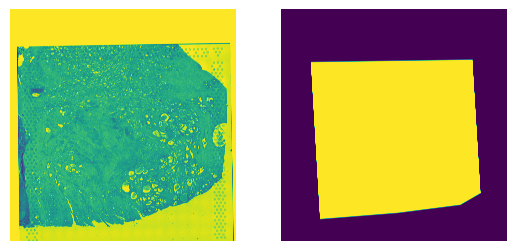

In [161]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(combined[..., 0])
axs[1].imshow(mask)
for ax in axs:
    ax.axis('off')

In [162]:
tifffile.imwrite(os.path.join(output_dir, 'tissue_mask.tif'), mask, compression='LZW')